In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("main_df_new.csv")
cols = data.columns

In [3]:
data_main = data[cols[:3]]
data_main.head(3)

,Year,Month,mean
0,1993,1,-11.404970
1,1993,2,-11.400982
2,1993,3,-11.532623


In [4]:
data = data_main.copy()

data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

data.set_index('Date', inplace=True)

In [5]:
data_new = pd.DataFrame({'Date': data.index, 'mean': data['mean']})

data_new = data_new[data_new['mean'] >= -50]

data_new.head(5)

,Date,mean
Date,,
1993-01-01,1993-01-01,-11.404970
1993-02-01,1993-02-01,-11.400982
1993-03-01,1993-03-01,-11.532623
1993-04-01,1993-04-01,-11.357281
1993-05-01,1993-05-01,-10.870235


In [6]:
time_series = data_new['mean']

scaler = MinMaxScaler(feature_range=(0, 1))

time_series_scaled = scaler.fit_transform(time_series.values.reshape(-1, 1))
time_series_scaled = pd.Series(time_series_scaled.flatten(), index=time_series.index)

train_size = int(len(time_series_scaled) * 1)


train = time_series_scaled[:train_size]




In [7]:
model = SARIMAX(train, order=(0, 0, 1), seasonal_order=(0, 2, 1, 60))
model_fit = model.fit(disp=False)

/anaconda/envs/jupyter_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/anaconda/envs/jupyter_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/anaconda/envs/jupyter_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [8]:
forecast_values = model_fit.forecast(steps=36).to_numpy()


/anaconda/envs/jupyter_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/anaconda/envs/jupyter_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


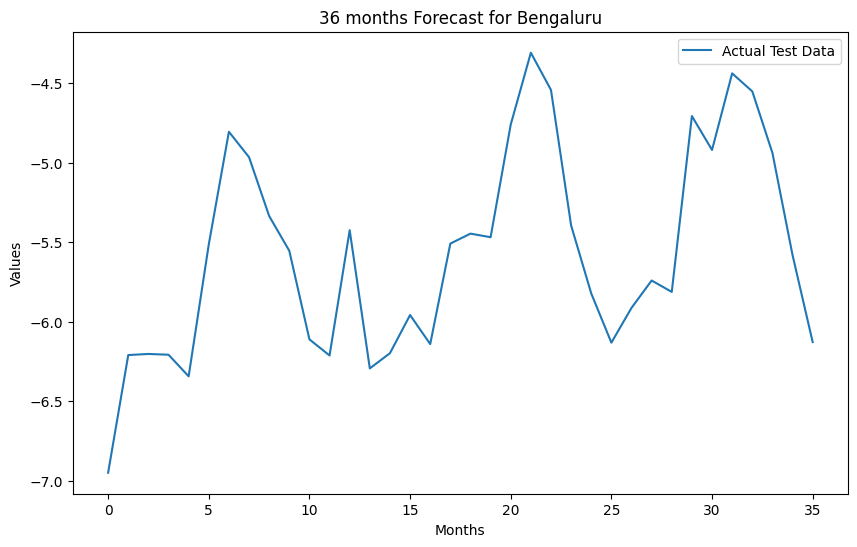

In [9]:
forecast_scaled = scaler.inverse_transform(forecast_values.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(forecast_scaled, label='Actual Test Data')



plt.title('36 months Forecast for Bengaluru')
plt.xlabel('Months')
plt.ylabel('Values')
plt.legend()

plt.show()

In [10]:
trend_forecast 

NameError: name 'trend_forecast' is not defined

In [ ]:
forecast_scaled_flattened = forecast_scaled.flatten()

window_size = 15
trend_forecast = pd.Series(forecast_scaled_flattened).rolling(window=window_size, center=True).mean()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(trend_forecast, label='Trend for Bengaluru')
plt.title('Trend in 36 Month Forecast for Bengaluru')
plt.xlabel('Months')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()
